<a href="https://colab.research.google.com/github/yesong98/yesong/blob/master/dietanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 예측을 위한 EDA

때때로 인생에는 가능한 최악의 시간에 항상 원했던걸 주는 잔인한 유머감각이 있다. -Lisa Kleypas

* 타이타닉호의 침몰은 역사상 가장 악명높은 난파선중 하나입니다. 1912년 4월 15일 처녀 항해 중 타이타닉호는 빙산과 충돌하여 침몰, 2224명의 승객과 승무원 중 1502명이 사망했습니다. 그래서 이름이 DieTanic입니다. 이것은 세계 어느 누구도 잊을 수 없는 재난입니다.

* 타이타닉을 만드는데 약 750만 달러가 들엇고 충돌로 인해 바다에 가라앉았습니다. Titanic Dataset은 초보자가 데이터 과학여행을 시작하고 Kaggle대회에 참가할 수 있는 매우 좋은 데이터세트 입니다.

* 이 노트북의 목적은 예측 모델링 문제의 워크플로가 어떤것인지 아이디어를 제공하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 일부 기계 학습 개념을 추가하는 방법, 나는 초보자도 모든 단계를 이해할 수 있도록 노트북을 가능한 한 기초로 유지하려고 노력했습니다.



### Contents of the Notebook:
#### Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

#### Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

#### Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

### Part1: Exploratory Data Analysis(EDA)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt. style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
data=pd.read_csv('../content/train (1).csv')

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.isnull().sum()
# 총 null 값 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age,Cabin 및 Embarked에는 null 값이 있습니다. 저는 그것을 고칠 것입니다.

##### How many Survived??

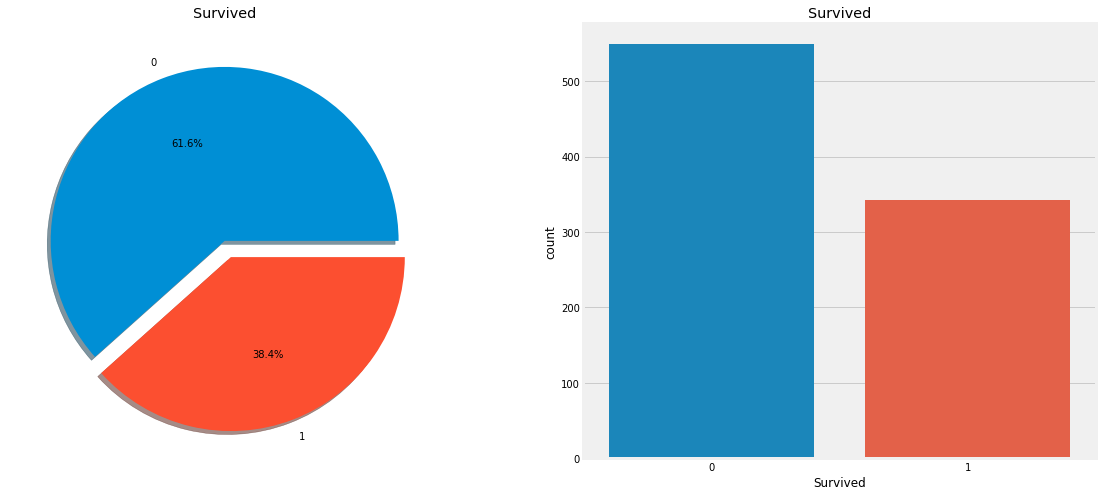

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고에서 살아남은 승객은 많지 않은 것이 분명합니다.

훈련세트에 있는 891명의 승객 중 약 350명만 생존했습니다. 즉, 전체 훈련세트의 38.4%만이 충돌에서 생존했습니다. 데이터에서 더 나은 통찰력을 가지고 생존한 승객과 그렇지 못한 승객을 확인하려면 더 자세히 조사해야합니다.

dataset의 다양한 기능을 사용하여 생존률을 확인하려고 합니다. 일부 기능은 성별, 탑승구항,연령 등입니다. 

먼저 다양한 유형의 기능을 이해해보겠습니다.

# Types Of Features

### Categorical Features:
범주형 변수는 두 개 이상의 범주가 있는 변수이며 해당기능의 각 값은 범주별로 분류될 수 있습니다. 예를 들어, 성별은 두개의 범주(남성,여성)가 있는 범주형 변수입니다. 이제 우리는 그러한 변수를 정렬하거나 정렬할 수 없습니다. 명목변수라고도 합니다.

dataset의 범주적 특징: 성별,탑승구

### Oridinal(서수) Features:
순서형 변수는 범주형 값과 유사하지만 두 값 사이에 상대적인 순서를 지정하거나 정렬할 수 있다는 차이점이 있습니다. 예를 들어 높이, 중간, 짧은 값을 가진 높이와 같은 기능이 있는 경우 높이는 서수 변수입니다. 여기서 우리는 변수에 상대적 정렬을 가질 수 있습니다.

dataset의 서수 특징:Pclass

### Continuous Feature:
특성이 두점 사이 또는 특성 열의 최소값 또는 최대값 사이의 값을 취할 수 있는 경우 특성을 연속적이라고 합니다.

dataset의 연속 기능: 연령


### Analysing The Features

### Sex->Categorical Feature

In [11]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

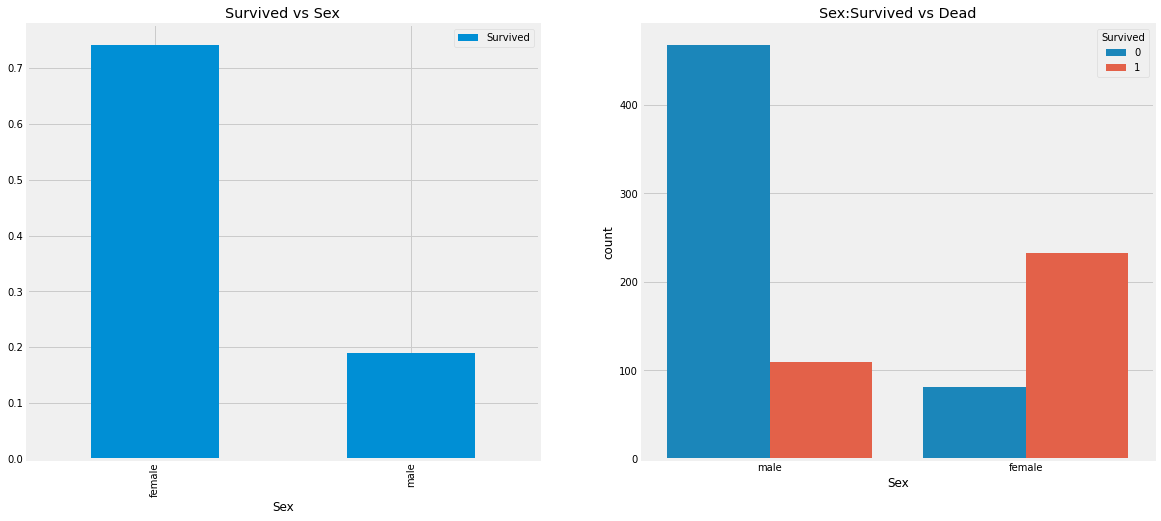

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 탄 남성의 수는 여성의 수보다 훨씬 많습니다. 여전히 구조된 여성의 수는 구조된 남성의 수의 거의 두배 입니다. 배에 탄여성의 생존율은 약75%이고 남성의 생존율은 약 18-19%입니다.

이건 모델링이 매우 중요한 기능으로 보입니다. 근데 이게 최선일까요? 다른 기능을 알아봅시다

### Pclass -> Oridinal Feature

In [13]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


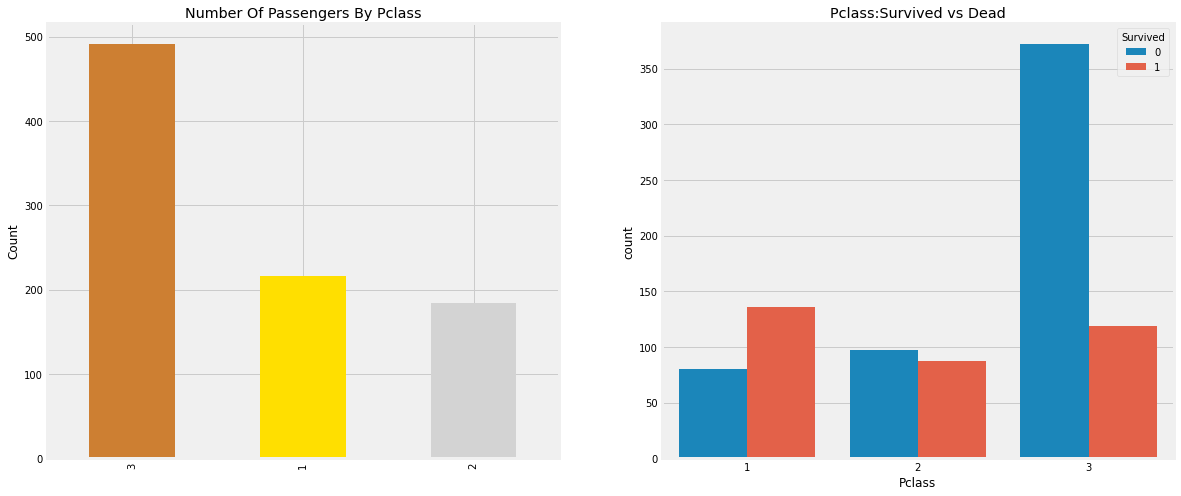

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈으로 모든 것을 살 수 없다고 말합니다. 그러나 우리는 Pclass1의 탑승객이 구조되는 동안 매우 높은 우선순위를 받았다는 것을 분명히 아 수 있습니다. Pclass3의 승객 수가 훨씬 많았음에도 불구하고 여전히 생존자의 수는 약25%정도로 매우 낮습니다.

Pclass1의 경우 생존율은 약 63%이고 Pclass2의 경우 약 48%입니다. 그래서 돈과 지위가 중요합니다

조금 더 자세히 살펴보고 다른 흥미로운 관찰을 확인해 보겠습니다. Sex and Pclass Together로 생존율을 확인해봅시다

In [15]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

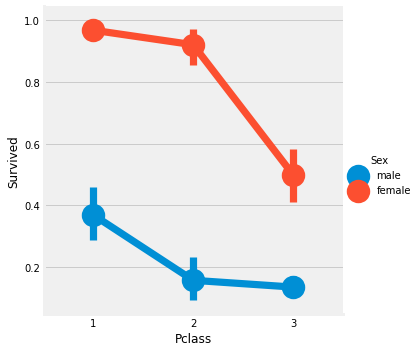

In [16]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

이 경우 FactorPlot을 사용합니다. 범주형 값을 쉽게 분리할 수 있기 때문입니다.

CrossTab과 FactorPlot을 보면 Pclass1의 여성 94명 중 3명만이 사망했기 때문에 Pclass1의 여성 생존율이 약 95-96%임을 쉽게 추론할 수 있습니다.

Pclass와 상관없이 구조 시 여성이 우선인 것은 분명하다. Pclass1의 남자조차도 생존율이 매우 낮습니다.

Pclass도 중요한 기능인 것 같습니다. 다른기능도 분석해 봅시다.

## Age -> Countinous Feature


In [17]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of 0.42 Years
Average Age on the ship: 29.69911764705882 Years


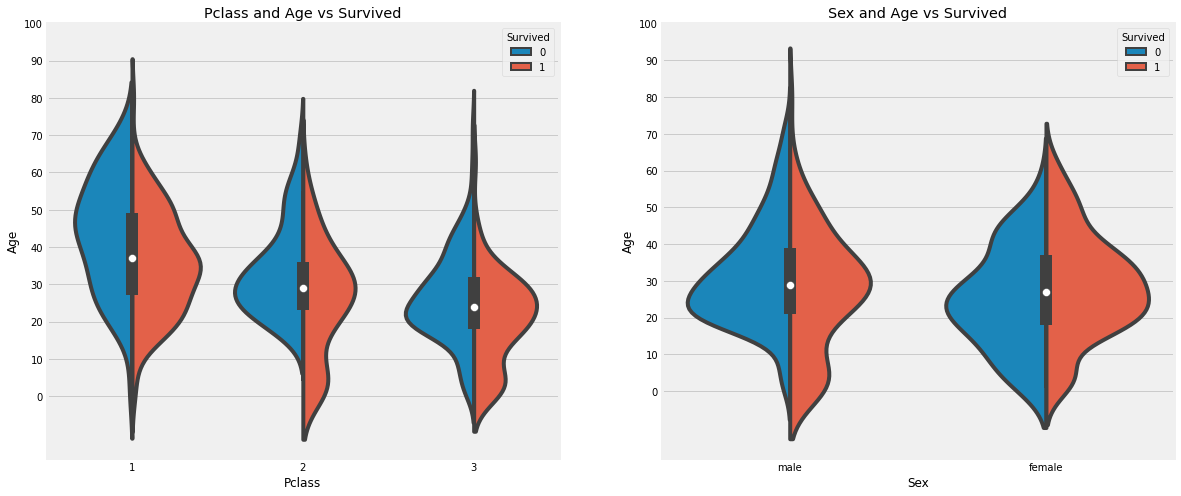

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

##### Observations:
1) Plcass에 상관없이 아동의 수는 증가하고 10세 미만 승객의 생존율은 양호해 보인다.
2) Pclass1의 20-50세 승객의 생존 가능성이 높고 여성이 더 좋습니다
3) 남성의 경우 나이가 들수록 생존 확률이 낮아집니다.

이전에 보았듯이 Age기능에는 177개의 null값이 있습니다. 이러한 NaN값을 대체하기 위해 데이터 세트의 평균 수명을 할당 할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많았다는 것입니다. 우리는 평균 연령이 29세인 4세 아이를 할당할 수 없습니다. 승객이 거짓말을 하는 연령대를 알 수 있는 방법이 있을까요?

빙고! 이름 기능을 확인할 수 있습니다. 특성을 살펴보면 이름에 Mr또는 Mrs와 같은 인사말이 있음을 알 수 있습니다. 따라서 Mr 및 Mrs의 평균 값을 각 그룹에 할당할 수 있습니다.

**''What's In A Name??''---> Feature :p****

In [19]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
# lets extract the Salutations

여기서 정규식을 사용하고 있습니다. [A-Za-z]+)  이것이 하는 일을 A-Z또는 a-z 사이에 있고 뒤에 .(dot). 오는 문자열을 찾는 것입니다. 따라서 이름에서 이니셜을 성공적으로 추출합니다.

In [20]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')
#Checking the Initials w

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


좋습니다. Miss를 나타내는 Mlle또는 Mme와 같이 철자가 틀린 이니셜이 있습니다. 나는 그것들을 miss로 대체하고 다른 값에 대해서도 같은 것을 사용하겠습니다.

In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
data.groupby('Initial')['Age'].mean()
#lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [23]:
## Assigning the NaN Values with the Ceil values of the mean ages(평균 연령의 Ceil 값으로 NaN 값 할당)
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [24]:
data.Age.isnull().any()
#So no null values left finally(따라서 최종적으로 null 값이 남지 않습니다.)

False

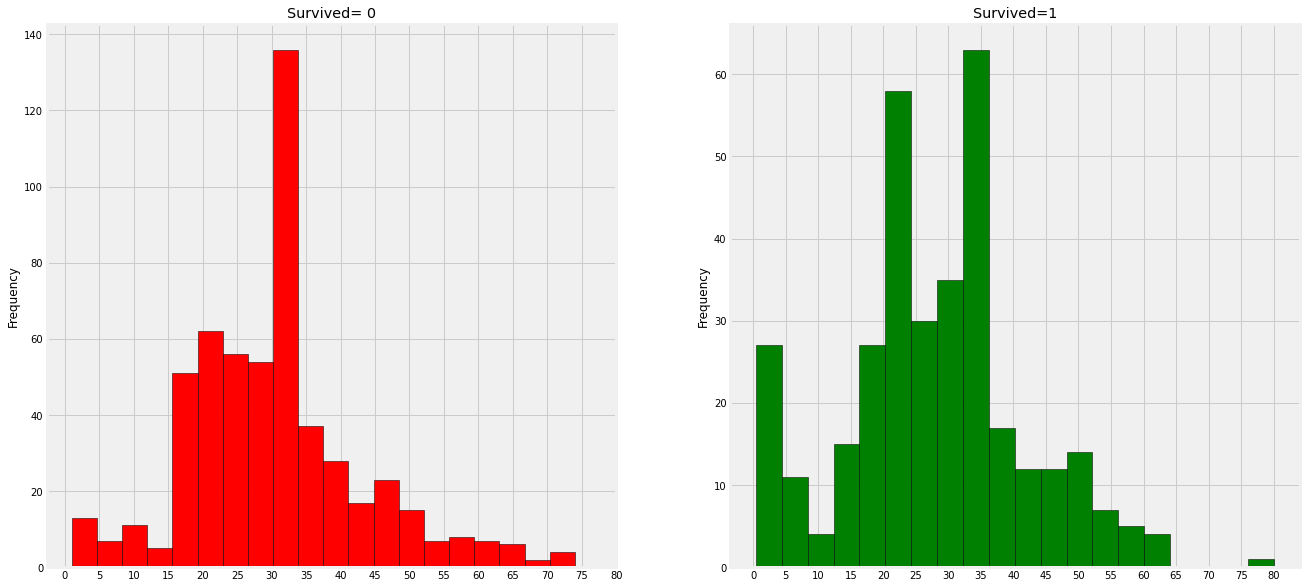

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1) #set_xticks는 눈금 설정
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Python matplotlib 모듈로 그래프를 그릴 때,  
 
(1) 눈금 설정하기 : set_xticks(), set_yticks()
(2) 눈금 이름 설정하기 : set_xticklabels(), set_yticklabels()
(3) 축 이름 설정하기 : set_xlabel(), set_ylabel()
(4) 제목 설정하기 : set_title()  
(출처: https://rfriend.tistory.com/710 [R, Python 분석과 프로그래밍의 친구 (by R Friend):티스토리])

관찰:
1) 유아(5세 미만)를 많이 구함(여성아동우선정책)  
2) 가장 나이가 많은 승객을 구함(80세)  
3) 최대 사망자 수는 30~40대 연령층

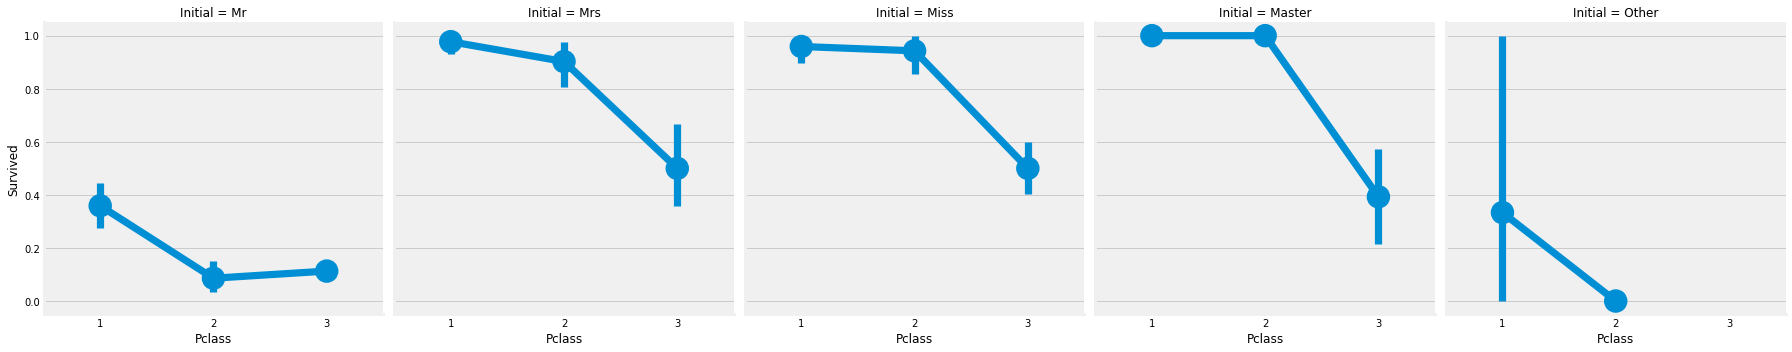

In [26]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

따라서 여성과 아동 우선 정책은 계급에 관계없이 유효합니다.

- error bar가 길수록 신뢰도 낮음

### Embarked->Categorical Value

In [27]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation(승선항의 생존 가능성)

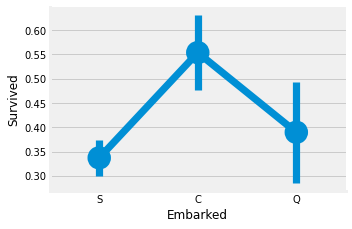

In [28]:
sns.factorplot('Embarked','Survived',data=data) 
fig=plt.gcf() 
fig.set_size_inches(5,3)
plt.show()

#### plt.gcf()
figure을 많이 만들어 놓으면 어떤 figure이 있는지 알기 어려워진다. 현재 figure를 확인하기 위한 방법으로는 plt.gcf()를 사용한다. gcf는 get current figure의 약어로, 아래의 예에서 각각의 plt.gcf() 출력 결과가 어떻게 바뀌는지 알 수 있다.
출처: https://engineer-mole.tistory.com/215 [매일 꾸준히, 더 깊이:티스토리]

항구C의 생존 가능성은 0.55부근에서 가장 높고 S의 경우 가장 낮습니다.

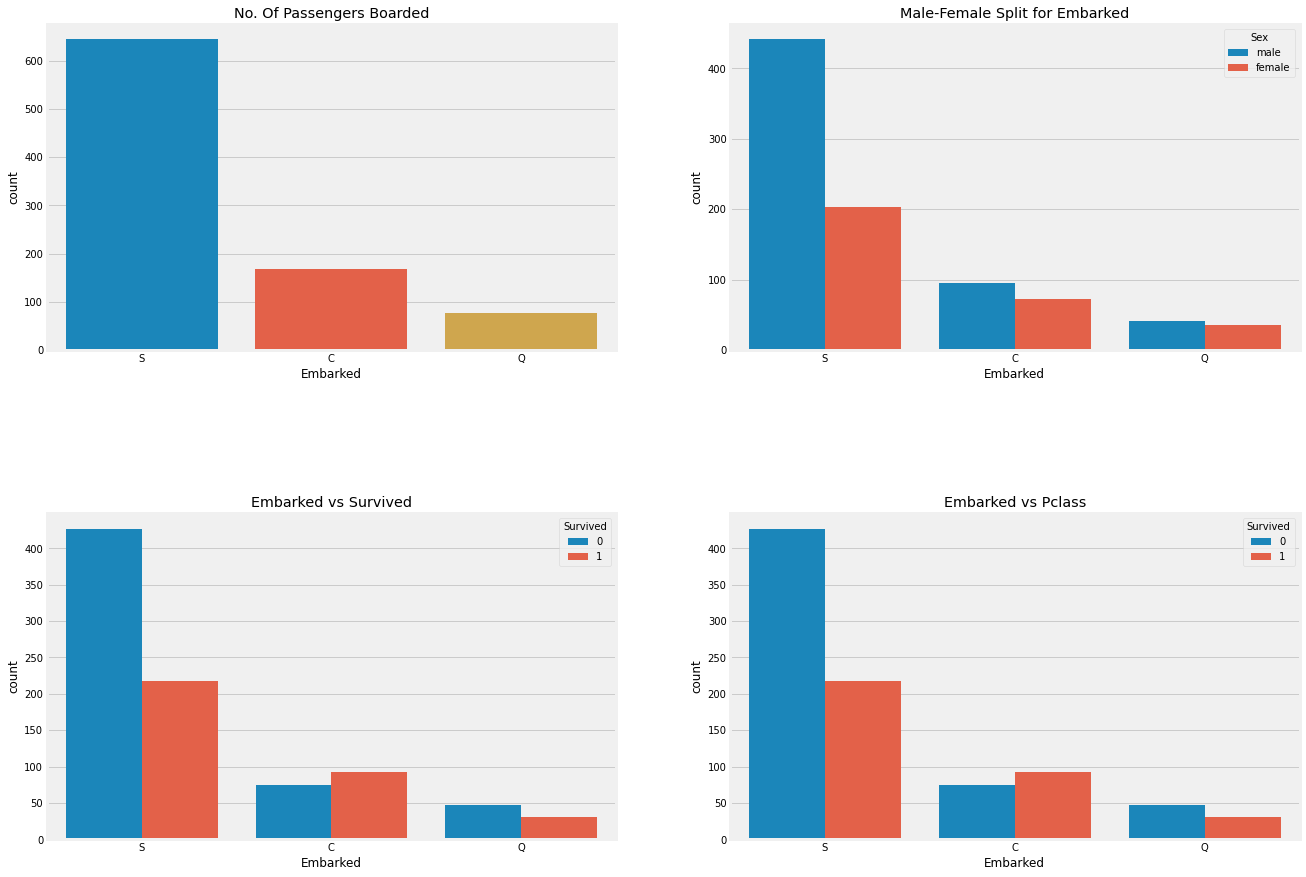

In [29]:
f,ax=plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5) #서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율 조절

plt.show()

* tight_layout 이용
    - subplot들이 겹치지 않도록 여백을 만듬
    - subplot은 줄어듬, figure크기는 변하지 않는다
    - 가로여백, 세로여백을 따로 주고싶다면 w_pad,h_pad사용

* subplots_adjust
    - subplots_adjust인자를 넣어주어야 동작


* 관찰  
1) S에서 탑승한 승객의 대부분이 Pclass3에서 탑승했다  
2) C에서 온 승객들은 그들 중 상당수가 살아남았기 때문에 운이 좋아 보인다. 그 이유는 아마도 모든 Pclass1 및 Pclass2 승객의 구조일 것이다.  
3) 탑승구S는 대다수의 부자들이 탑승한 항구를 바라보고있고 여전히 생존가능성은 낮다. Pclass3의 승객 중 81%정도가 생존하지 못했다  
4) 탑승구 Q는 승객의 거의 95%가 Pclass3에서 왔다.

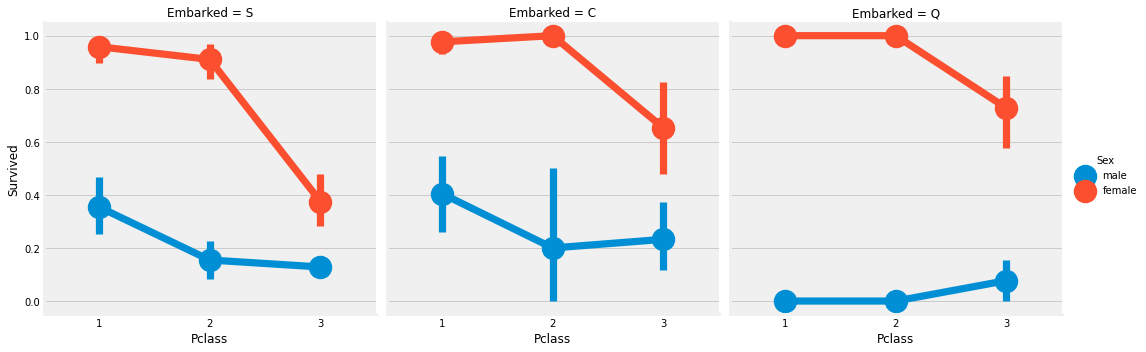

In [30]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

* 관찰  
1) Pclass에 관계없이 Pclass1,Pclass2 여성의 생존률이 거의 1이다.  
2) 남녀 모두 생존율이 매우 낮기 때문에 PortS는 Pclass3탑승객에게 매우 불행한것으로 보인다(금전문제)  
3) 포트 Q는 거의 모든 Pclass3에서 나왔기 때문에 남성에게 가장 불행한것 같다  

* Filling Embarked NaN  
    - Port S에서 탑승한 최대 승객을 보았으므로 NaN을 S로 바꾼다.  

In [31]:
data['Embarked'].fillna('S',inplace=True)

In [32]:
data.Embarked.isnull().any()
# Finally No NaN values(모두제거)

False

factorplot### SibSip->Discrete Feature
이 기능은 사람이 혼자인지 가족과 함께있는지 나타냅니다

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [33]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')
#crosstab은 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할때 사용

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


#### crosstab
분석을 하다 보면 원본 데이터의 구조가 분석 기법에 맞지 않아서 행과 열의 위치를 바꾼다거나, 특정 요인에 따라 집계를 해서 구조를 바꿔주어야 하는 재구조화 함수  
(출처: https://rfriend.tistory.com/280 [R, Python 분석과 프로그래밍의 친구 (by R Friend):티스토리])

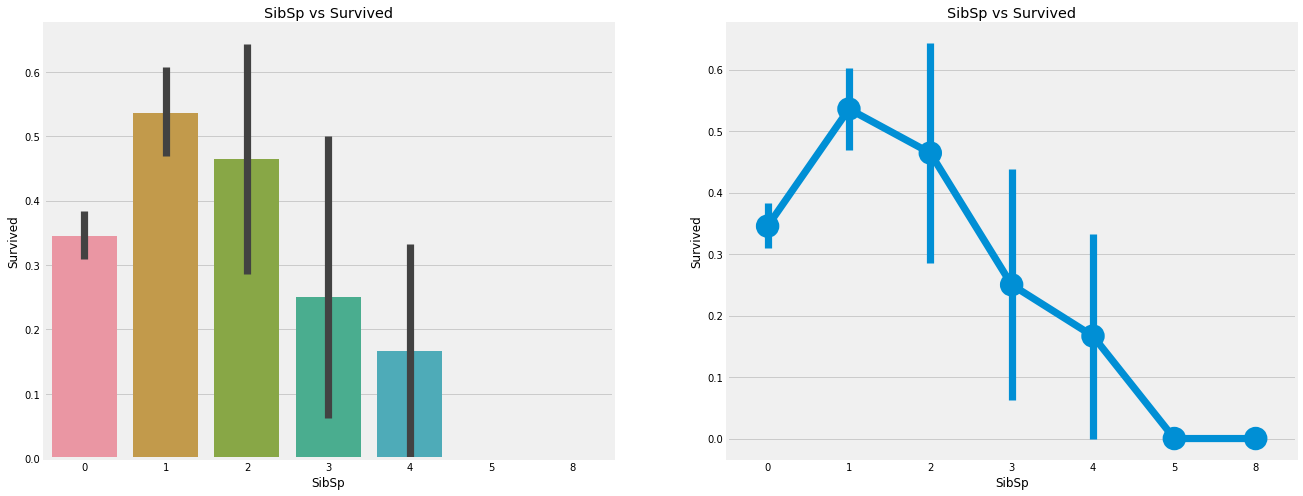

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()
# barplot에서 가는선은 추정치이다. 이는 신뢰구간과 유사
# 이 범위는 기본적으로 부트 스트랩 신뢰구간이라는 것을 사용한다.
# 이 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것이라는 의미
# 신뢰구간이 아니라 표준편차를 표현하고 싶으면 파라미터로 ci="sd" 저장

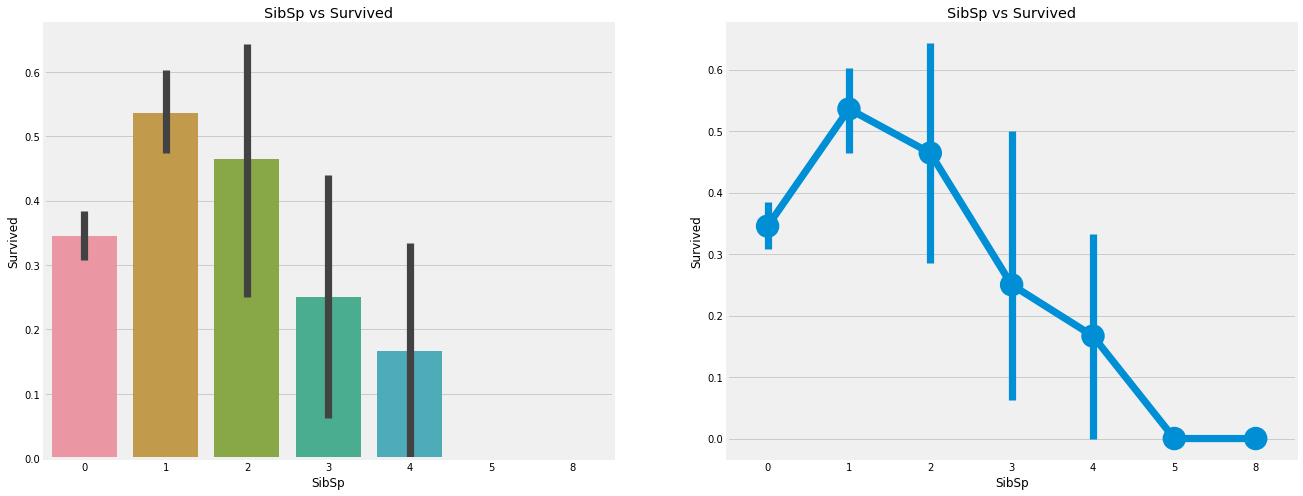

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [36]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### ***figure-level***
- 함수가 제공하는 가장 유용한 기능은 여러 서브플롯이 있는 Figure를 쉽게 생성할 수 있다는 것  
- 종류별 매개변수는 함수 서명이나 독스트링에 나타나지 않습니다. 일부 기능은 검색 가능성이 낮을 수 있으며 특정 목표를 달성하는 방법을 이해하기 전에 설명서의 두 페이지를 살펴봐야 할 수도 있습니다

#### ***Axes-level***
- 축수준함수





* 관찰
 * barplot및 factorplot은 승객이 형제 없이 혼자 탑승하는 경우 생존율이 34.5%임을 보여줍니다. 형제 수가 증가하면 그래프가 대략적으로 감소합니다. 이것은 의미가 있습니다. 즉, 배에 가족이 있다면 나 자신을 먼저 구하는 것이 아니라 가족을 구하려고 합니다. 놀랍게도5-8인 가족의 생존율은 0%입니다. 
 * 이유는 Pclass입니다. 교차분석은 SibSp>3인 사람이 모두 Pclass3에 있음을 보여줍니다. Pclass3()의 모든 대가족이 사망했습니다.

In [37]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')
#parch는 부모자식 명수의 총 합

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


교차분석은 더 큰 가족이 Pclass3에 있음을 다시 보여줍니다.

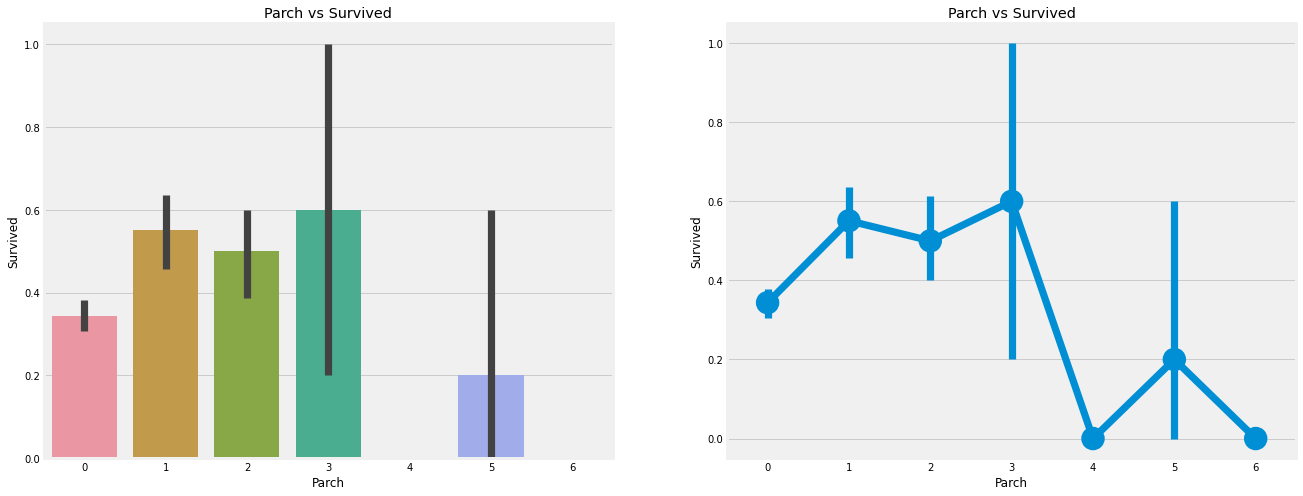

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch','Survived', data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

* 관찰
여기에서도 결과는 매우 유사합니다. 부모와 함께 탑승한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라갈수록 감소합니다

배에 1-3명의 부모가 있는 사람에게는 생존가능성이 좋습니다. 혼자 있는 것도 치명적이며 누군가가 배에 4명 이상의 부모가 있는 경우 생존 가능성이 감소합니다.


### Fare->Continous Feature

In [39]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


최저 요금은 0입니다. 무료 호화로운승차

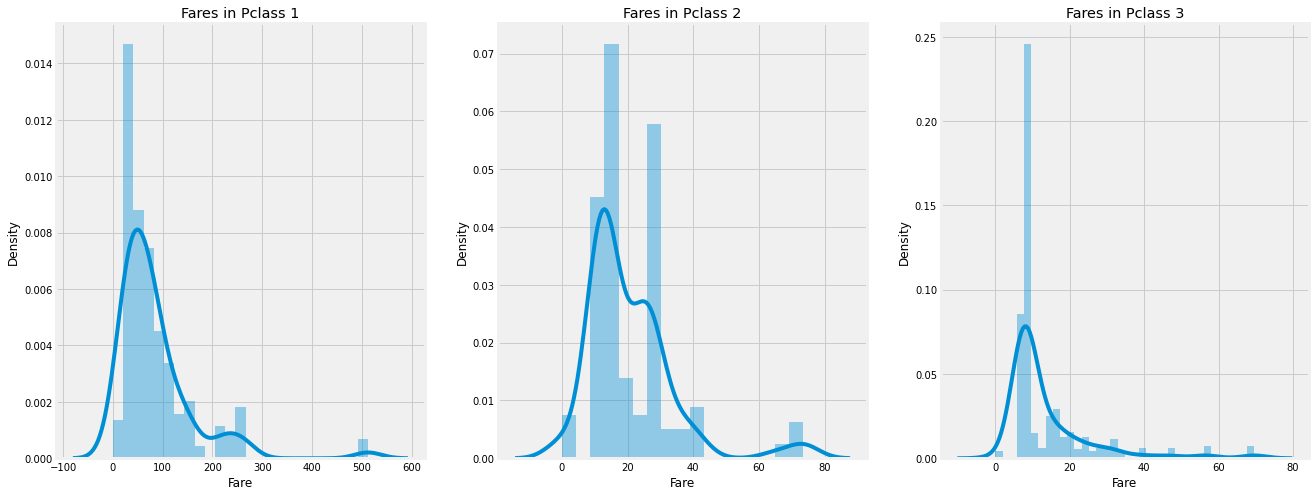

In [40]:
f,ax=plt.subplots(1,3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1 승객의 운임 분포가 크게 나타나고 이 분포는 기준이 감소함에 따라 계속 감소합니다. 이것도 연속적으로 비닝을 사용하여 이산값으로 변환할 수 있습니다.

### Observations in a Nutshell for all features(모든 기능에 대한 간략한 관찰):
* 성별: 여성의 생존 가능성은 남성에 비해 높습니다
* pclass:1등석 승객이 되면 생존 가능성이 더 높아진다는 가시적인 추세가 있습니다. Pclass3의 생존율은 매우 낮습니다. 여성의 경우 Pclass1의 생존 확률은 거의 1이고 Pclass의 생존확률도 높습니다.(돈이 이긴다)
* 연령: 5-10세 미만의 어린이는 생존 가능성이 높습니다. 15세에서 35세 사이의 승객이 많이 사망했습니다.
* 착수: 이것은 매우 흥미로운 기능입니다. Pclass1승객의 대다수가 S에 탔음에도 불구하고 C에서 생존할 확률이 더 좋아보입니다. Q의 승객은 모두 Plcass3에서 왔습니다.
* Parch+SibSp: 1-2명의 형제자매,배우자가 탑승하거나 1-3명의 부모가 있는 경우 혼자이거나 대가족이 함께 여행하는 것보다 가능성이 더 높습니다.

### Correlation Between The Features

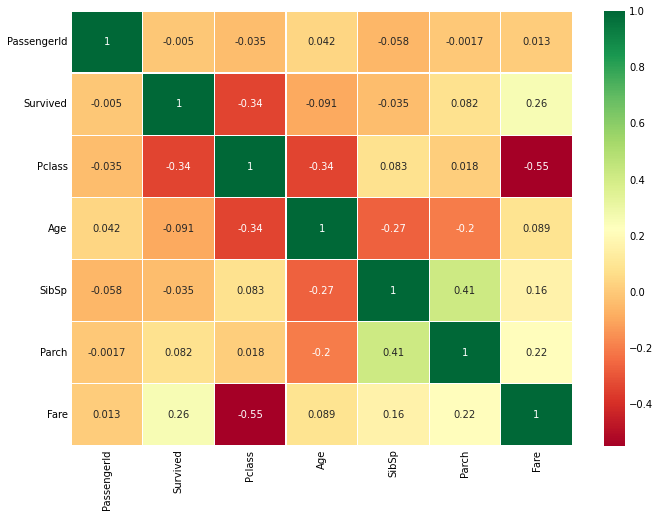

In [41]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
#data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### corr
- corr메서드는 각 열 간의 상관 계수를 반환하는 메서드입니다.
- corrwith메서드는 두 DataFrame객체의 동일한 행/열 간의 상관 계수를 반환하는 메서드입니다.
- 상관계수 산정 방식에는 피어슨 상관계수, 켄달-타우 상관계수, 스피어먼 상관계수를 사용합니다.
- DataFrame.corr () 함수는 쌍별 상관 관계를 수행하므로 두 변수에서 네 쌍이 있습니다. 따라서 기본적으로 대각선 값은 자동 상관 (자체와의 상관, 두 개의 변수가 있기 때문에 두 값)으로, 다른 두 값은 서로의 상호 상관으로, 그 반대의 경우도 마찬가지입니다.

### 히트맵 해석
가장 먼저 주목해야할 것은 알파벳이나 문자열 사이의 상관관계를 알 수 없다는 것이 명백하기 때문에 숫자 기능만 비교된다는 것입니다. 플롯을 이해하기 전에 상관관계가 정확히 무엇인지 살펴보겠습니다.  

양의 상관관계: 특성 A의 증가가 특성B의 증가로 이어진다면 양의 상관관계가 있습니다. 값1은 완전한 양의 상관관계를 의미합니다.  

이제 두기능이 고도로 또는 완벽하게 상관관계가 있으므로 하나의 증가가 다른 특서으이 증가로 이어진다고 가정해 보겠습니다. 이는 두 기능 모두 매우 유사한 정보를 포함하고 잇으며 정보의 변동이 거의 없음을 의미합니다. 둘다 거의 동일한 정보르 ㄹ포함하므로 이를 다중공선성(MultiColinearity)라고 합니다.  

둘중 하나가 중복되므로 둘다 사용해야 한다고 생각합니까? 모델을 만들거나 훈련을 하는 동안 훈련시간과 많은 이점을 줄이므로 중복기능을 제거하려고 노력해야합니다.

이제 위의 히트맵에서 특징이 그다지 상관관계가 없음을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parch사이, 즉 0.41입니다. 따라서 모든 기능을 계속 사용할 수 있습니다.

# Part2: Feature Enginnering and Data Cleaning(기능 엔지니어링 및 데이터정리)
기능 엔지니어링이란 무엇입니까??  

기능이 있는 데이터세트가 제공될 때 마다 모든 기능이 중요할 필요는 없습니다. 제거해야 할 중복 기능이 많이 있을 수 있습니다. 또한 다른 기능을 관찰하거나 정보를 추출하여 새로운 기능을 얻거나 추가할 수 있습니다.  

예를 들어 이름 기능을 사용하여 이니셜 기능을 가져오는 것이 있습니다. 새로운 기능을 얻고 몇가지를 제거할 수 있는지 봅시다. 또한 기존관련 기능을 Predictive Modeling에 적합한 형식으로 변환합니다.

Age_band
연령 기능 문제:
나이는 연속적인 특성이라 앞서 언급했듯이 기계학습 모델의 연속변수에는 문제가 있습니다.

예: 스포츠인을 성별로 그룹화하거나 정렬하라고 하면 쉽게 남성과 여성으로 구분할 수 있습니다.

이제 연령별로 그룹화하라고 하면 어떻게 하시겠습니까? 30명의 사람이 있는 경우 30개의 연령 값이 있을 수 있습니다. 이제 이것이 문제가 됩니다.

Binning 또는 Normalization을 통해 이러한 연속 값을 범주형 값으로 변환해야합니다. 나는 비닝(binning)을 사용할 것입니다. 즉 연령범위를 단일 빈으로 그룹화하거나 단일 값을 할당합니다.

승객의 최대 연령은 80세 였습니다. 따라서0-80의 범위를 5개의 빈으로 나눕니다. 80/5=16입니다. 따라서 크기가 16인 상자입니다.

In [42]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [43]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')
#checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


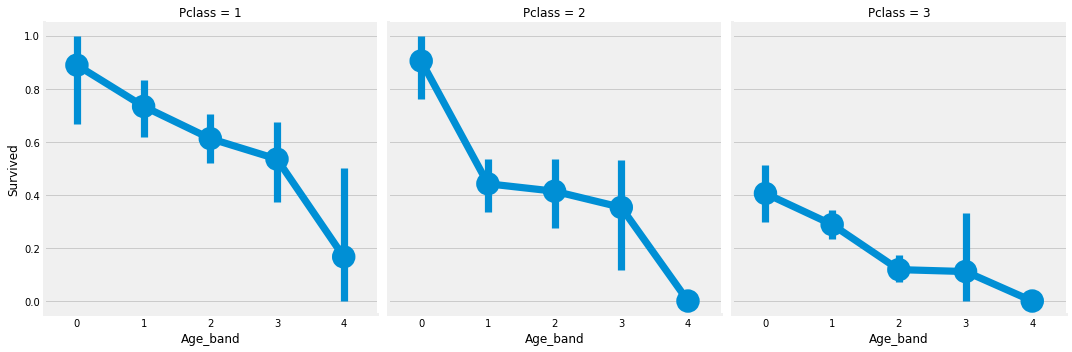

In [44]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

사실..Pclass와 상관없이 연령이 증가할수록 생존율이 감소합니다.

#### Family_Size and Alone
이 시점에서 "Family_size"및"Alone"이라는 새 기능을 만들고 분석할 수 있습니다. 이 기능은 Parch와 SibSp의 합입니다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다. Alone은 승객이 혼자인지 여부를 나타냅니다.

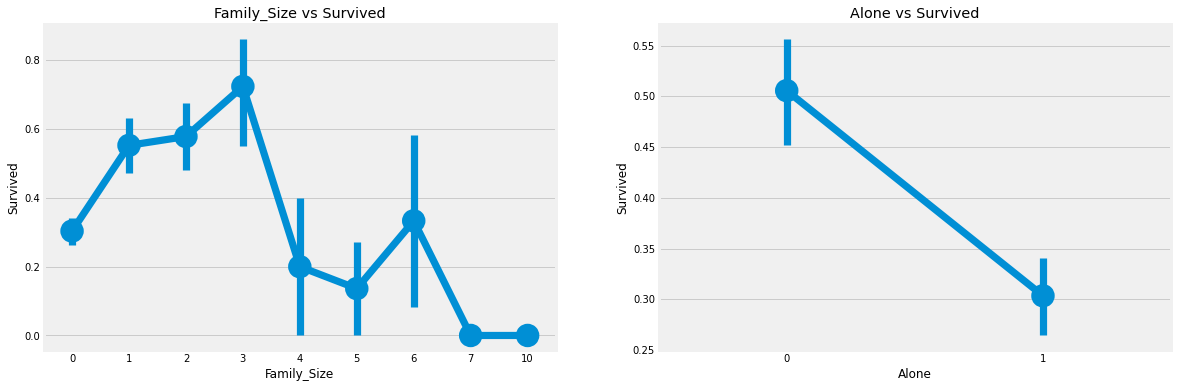

In [45]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp'] #family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1 #Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()


* Family_Size=0은 승객이 혼자임을 의미합니다. 분명히 당신이 혼자이거나 family_size=0인 경우 생존가능성이 매우 낮습니다. 가족 규모 4초과인 경우 기회도 줄어듭니다. 이것은 또한 모델의 중요한 기능으로 보입니다. 이것을 더 조사해봅시다. 

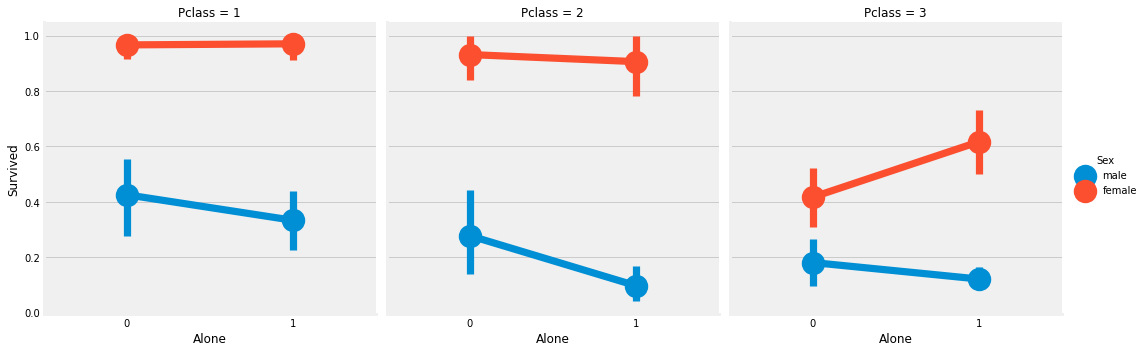

In [46]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

혼자 있는 여성이 가족이 있는 여성보다 혼자일 확률이 높은 Pclass3를 제외하고 성별이나 Pclass를 불문하고 혼자 있는 것이 해롭다는 것을 알 수 있다.

### Fare_Range
요금도 연속적 특성이므로 서수 값으로 변환해야 합니다. 이를 위해 우리는 Pandas..qcut을 사용할 것입니다.

따라서 qcut이 하는 일은 우리가 전달한 빈의 수에따라 값을 분할하거나 정렬하는 것입니다. 따라서 5개의 빈에 대해 전달하면 5개의 개별 빈 또는 값 범위에 균등한 간격으로 값을 정렬합니다.

In [47]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, 요금 범위가 증가할수록 생존 가능성이 증가한다는 것을 분명히 알 수 있습니다.
이제 Fare_Range값을 그대로 전달할 수 없습니다. Age_Band에서 했던 것과 같은 싱글톤 값으로 변환해야합니다.

In [48]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

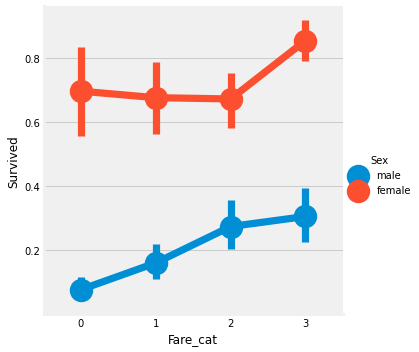

In [49]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

분명히 Fare_cat이 증가할 수록 생존 확률이 높아집니다. 이기능은 Sex와 함께 모델링 시 중요한 기능이 될 수 있습니다.

#### Converting String Values into Numeric(문자열 값을 숫자로 변환)
기계 학습 모델에 문자열을 전달할 수 없으므로 Sex,Embarked등과 같은 기능을 숫자 값으로 변환해야합니다.


In [50]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### 불필요한 기능 삭제
Name: 범주형 값으로 변환할 수 없으므로 이름 기능이 필요하지 않습니다.  
Age:Age_band기능이 있으므로 필요하지 않습니다.  
Ticket:분류할 수 없는 임의의 문자열입니다.  
Fare: Fare_cat 기능이 있으므로 필요하지 않습니다.  
Cabin: 많은 NaN 값과 많은 승객이 여러 개의 객실을 가지고있습니다. 이것은 쓸모없는 기능입니다.  
Fare_Range: fee_cat기능이 있습니다.  
PassengerId: 분류할 수 없습니다.

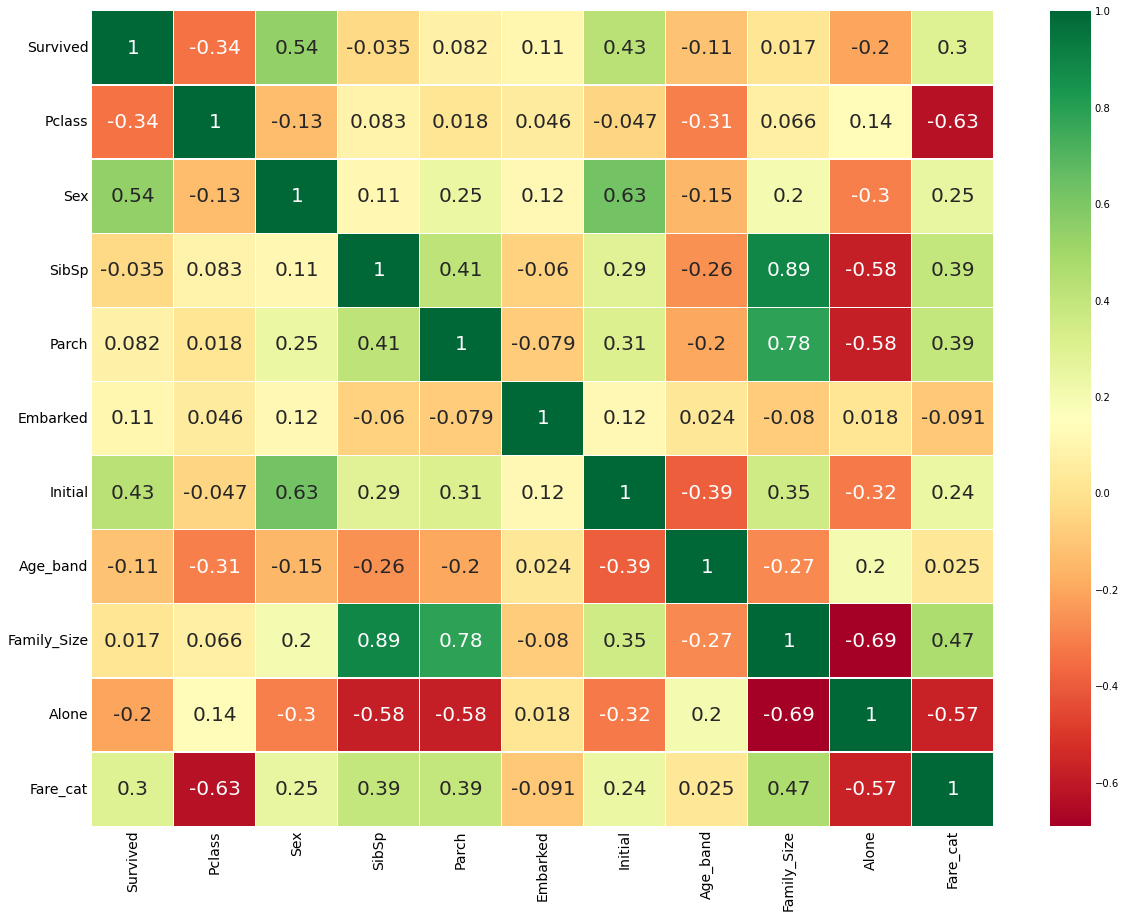

In [51]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

이제 위의 상관관계 플롯에서 몇가지 긍정적인 관련기능을 볼 수 있습니다. 그들 중 일부는 SibSp 및 Family_Size, Parch및 Family_Size, Alone 및 Family_Size와 같은 부정적인 것입니다.

# PART3: Predictive Modeling(예측 모델링)
우리는 EDA부분에서 몇 가지 통찰력을 얻었습니다. 그러나 그것으로 승객이 생존할지 사망할지 정확하게 예측하거나 말할 수 없습니다. 이제 우리는 훌륭한 분류 알고리즘을 사용하여 승객이 생존할지 여부를 예측할것입니다. 다음은 모델을 만드는데 사용할 알고리즘입니다.  
1) Logistic Regression(로지스틱 회로)

2) Support Vector Machines(Linear and radial)(서포트 벡터머신-선형 및 방사형)

3) Random Forest(랜덤 포레스트)

4) K-Nearest Neighbours(K-가장 가까운 이웃)

5) Naive Bayes(나이브 베이즈)

6) Decision Tree(의사결정 트리)

7) Logistic Regression(로지스틱 회귀)

In [52]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [53]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

#### Radial Support Vectior Machines(rbf-SVM)(방사형 서포트 벡터머신)
-  Decision Boundary를 체계적인 방법으로 형성하는 것에 집중한다. 
- boundary의 선에 margin을 덧붙여서 최대한 점에 닿지 않도록 margin을 키우는 것
- SVC vs SVR의 직관적인 차이
    - 가장 큰 차이는 model의 cost에 존재한다. 
    - SVC의 경우 Margin안에 포함된 점들의 error를 기준으로 model cost를 계산한다. 
    - 거기에 반대방향으로 분류된, 즉 바운더리를 넘어서 존재하는 점들의 error만을 추가한다.  
    
#### <SVM의 장점과 단점>
장점
- 데이터의 분포를 모르는 경우 LDA처럼 covariance의 구조를 고려하는 것은 힘들다. 반면 SVM boundary근처의 관측치만 고려하여 LDA(선형판별분석)보다 데이터의 이해도가 떨어져도 사용할 수 있다.
- 그리고 예측의 정확도가 통상적으로 높다.

단점 
- C(에러들에게 부여하는 가중치, 커지면 에러를 최대한 범하지 말아야하고 작아지면 에러를 많이 허용한다는 것) 를 결정해야한다. 이는 경험적인 과정이기에 정답이 없다.
- parameter의 결정과 모형의 구축에 시간이 오래걸린다.

In [54]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is 0.835820895522388


#### Linear Support Vector Machine(linear-SVM)


In [55]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1) #  Decision Boundary를 구한 것
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for liner SVM is', metrics.accuracy_score(prediction2,test_Y))

Accuracy for liner SVM is 0.8171641791044776


#### Logistic Regression

In [56]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [57]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


#### K-Nearest Neighbours(KNN)



In [58]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


이제 n_neighbors 속성의 값을 변경함에 따라 KNN 모델의 정확도가 변경됩니다. 기본값은 5입니다. 다양한 n_neighbors 값에 대한 정확도를 확인합니다.

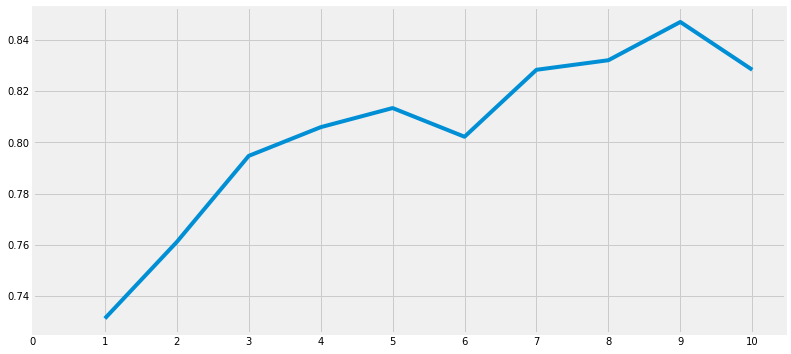

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [59]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [60]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [61]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8097014925373134


모델의 정확도가 분류기의 견고성을 결정하는 유일한 요소는 아닙니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되었으며 90%의 정확도를 기록했다고 가정해 보겠습니다.

이제 이것은 분류기의 정확도가 매우 좋은 것 같지만, 오는 모든 새로운 테스트 세트에 대해 90%가 될 것임을 확인할 수 있습니까??. 대답은 아니오입니다. 분류자가 자체 학습에 사용할 모든 인스턴스를 결정할 수 없기 때문입니다. 훈련 및 테스트 데이터가 변경되면 정확도도 변경됩니다. 증가하거나 감소할 수 있습니다. 이것을 모델 분산이라고 합니다.

이를 극복하고 일반화된 모델을 얻기 위해 Cross Validation을 사용합니다.

### 교차 검증  
여러 번 데이터가 불균형합니다. 즉, class1 인스턴스의 수는 많지만 다른 클래스 인스턴스의 수는 적을 수 있습니다. 따라서 데이터 세트의 모든 인스턴스에 대해 알고리즘을 훈련하고 테스트해야 합니다. 그런 다음 데이터 세트에 대해 언급된 모든 정확도의 평균을 취할 수 있습니다.

1) K-Fold 교차 검증은 먼저 데이터 세트를 k-서브셋으로 나누어 작동합니다.

2) 데이터 세트를 (k=5) 부분으로 나눕니다. 테스트를 위해 1개 부분을 예약하고 4개 부분에 대해 알고리즘을 훈련합니다.

3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 학습하여 프로세스를 계속합니다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다.

이것을 K-Fold 교차 검증이라고 합니다.

4) 알고리즘은 일부 훈련 데이터에 대한 데이터 세트에 대해 과소적합될 수 있고 때로는 다른 훈련 세트에 대한 데이터에 과대적합될 수도 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 얻을 수 있습니다.

In [62]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10,shuffle=True,random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.805855,0.045699
Naive Bayes,0.795843,0.054861
Random Forest,0.820474,0.050533


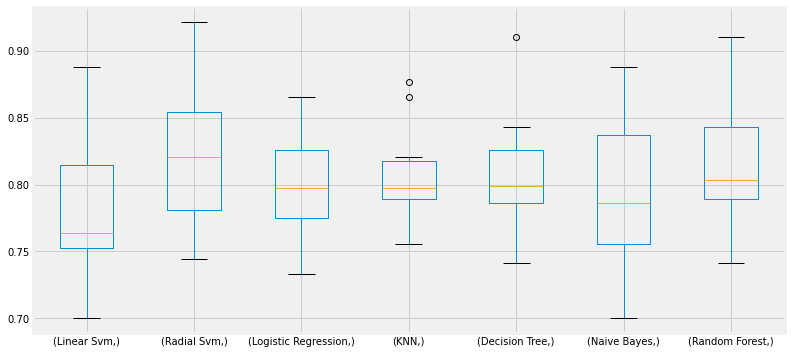

In [63]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

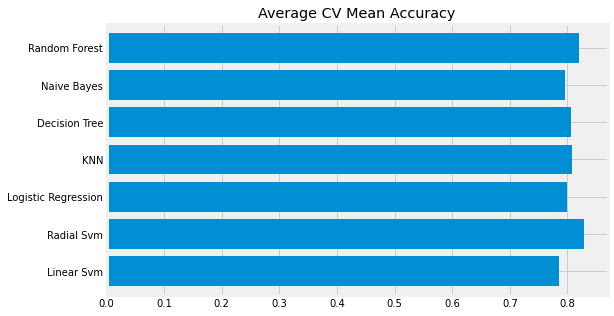

In [64]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 불균형으로 인해 때때로 오해의 소지가 있습니다. 모델이 어디에서 잘못되었는지 또는 모델이 어떤 클래스를 잘못 예측했는지 보여주는 혼동 행렬의 도움으로 요약된 결과를 얻을 수 있습니다.

### 혼란 매트릭스(Confusion Matrix)
분류자가 만든 정확하고 잘못된 분류의 수를 제공합니다.

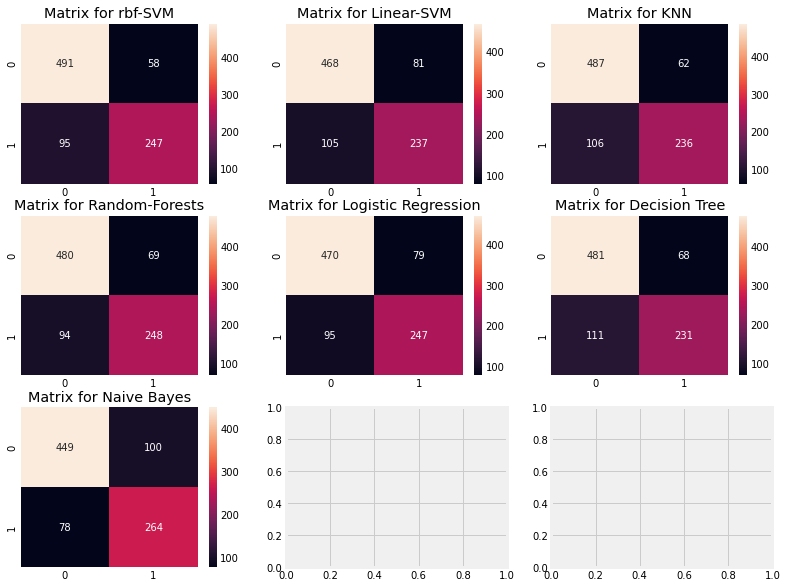

In [65]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix(혼동 행렬 해석)
왼쪽 대각선은 각 클래스에 대해 수행된 올바른 예측의 수를 나타내고 오른쪽 대각선은 잘못된 예측의 수를 나타냅니다. rbf-SVM의 첫 번째 플롯을 살펴보겠습니다.

1) 정확한 예측은 491(사망) + 247(생존)이며 평균 CV 정확도는 (491+247)/891 = 82.8%입니다.

2)오류--> 58명의 사망자를 생존자로, 95명이 사망한 것으로 잘못 분류했습니다. 따라서 죽은 사람을 생존자로 예측함으로써 더 많은 실수를 저질렀습니다.

모든 행렬을 보면 rbf-SVM이 사망한 승객을 정확하게 예측할 확률이 더 높지만 NaiveBayes가 생존한 승객을 정확하게 예측할 확률이 더 높다고 말할 수 있습니다.

### Hyper-Parameters Tuning(하이퍼 매개변수 조정)
기계 학습 모델은 블랙박스와 같습니다. 이 Black-Box에 대한 몇 가지 기본 매개변수 값이 있으며 더 나은 모델을 얻기 위해 조정하거나 변경할 수 있습니다. SVM 모델의 C 및 감마와 마찬가지로 다른 분류기에 대한 유사하게 다른 매개변수를 하이퍼 매개변수라고 하며 알고리즘의 학습률을 변경하고 더 나은 모델을 얻기 위해 조정할 수 있습니다. 이것을 하이퍼파라미터 튜닝이라고 합니다.

우리는 2개의 최고의 분류자, 즉 SVM과 RandomForests에 대한 하이퍼 매개변수를 조정할 것입니다.

### SVM

In [66]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True, n_jobs=2)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


n_jobs=횟수 

병렬적 방법  

randomsearch

### Random Forests

In [67]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-Svm의 최고 점수는 C=0.05및 감마=0.1일때 82.82%입니다. RandomForest의 경우 점수는 n_estimators=900일때 약 81.8%입니다.

### Ensembling(앙상블)
앙상블은 모델의 정확도나 성능을 높이는 좋은 방법입니다. 간단히 말해서 다양한 단순 모델을 조합하여 하나의 강력한 모델을 만드는 것입니다.

전화기를 구입하고 다양한 매개변수를 기반으로 많은 사람들에게 이에 대해 물어보고 싶다고 가정해 보겠습니다. 따라서 우리는 모든 다른 매개변수를 분석한 후 단일 제품에 대해 강력한 판단을 내릴 수 있습니다. 모델의 안정성을 향상시키는 Ensemblingdle입니다. 앙상블은 다음과 같은 방법으로 수행할 수 있습니다.

1) 투표 분류기
2) 배깅
3) 부스팅

### Voting Classifier 투표 분류기
다양한 단순기계학습 모델의 예측을 결합하는 가장 간단한 방법입니다. 모든 하위모델의 예측을 기반으로 평균 예측 결과를 제공합니다. 하위 모델 또는 기본 모델은 모두 다른 유형입니다.


In [68]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                                                                             ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                                                                             ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                                                                             ('LR',LogisticRegression(C=0.05)),
                                                                                             ('DT',DecisionTreeClassifier(random_state=0)),
                                                                                             ('NB',GaussianNB()),
                                                                                             ('svm',svm.SVC(kernel='linear',probability=True))
                                                                                                                                             ],
                                                                                                                     voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv =10,scoring ="accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


#### Bagging
배깅은 일반적인 앙상블 방법입니다. 데이터 세트의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 취하여 작동합니다. 평균화로 인해 분산이 감소합니다. 투표 분류기와 달리 배깅은 유사한 분류기를 사용합니다.

#### Bagged KNN
배깅은 분산이 높은 모델에서 가장 잘 작동합니다. 이에 대한 예로는 의사결정 트리 또는 랜덤포레스트가 있습니다. n_neighbours의 작은 값으로 KNN을 n_neighbours의 작은 값으로 사용할 수 있습니다.

In [69]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


#### Bagged DecisionTree

In [70]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y)) 
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


#### Boosting

부스팅은 분류기의 순차적 학습을 사용하는 앙상블 기술입니다. 약한 모델을 단계적으로 개선하는 것입니다. 부스팅은 다음과 같이 작동합니다.

모델은 먼저 전체 데이터 세트에서 학습됩니다. 이제 모델은 일부 인스턴스를 맞고 일부 인스턴스를 틀리게 됩니다. 이제 다음 반복에서 학습자는 잘못 예측된 인스턴스에 더 집중하거나 더 많은 가중치를 부여합니다. 따라서 잘못된 인스턴스를 올바르게 예측하려고 시도합니다. 이제 이 반복적인 프로세스가 계속되고 정확도의 한계에 도달할 때까지 새로운 분류기가 모델에 추가됩니다.

#### AdaBoost(어댑티브 부스팅)
이 경우 약한 학습자 또는 추정기는 결정 트리입니다. 그러나 우리는 dafault base_estimator를 우리가 선택한 알고리즘으로 변경할 수 있습니다.

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055



확률적 그라디언트 부스팅
여기에서도 약한 학습자는 의사결정나무입니다.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [73]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


AdaBoost에서 가장 높은 정확도를 얻었습니다. Hyper-Parameter Tuning으로 높여보도록 하겠습니다.

#### AdaBoost를 위한 하이퍼 파라미터 튜닝

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


AdaBoost로 얻을 수 있는 최대 정확도는 n_estimators=200 및 learning_rate=0.05일 때 83.16%입니다.

#### 최상의 모델을 위한 혼동 행렬

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feature Importance

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

RandomForests, AdaBoost 등과 같은 다양한 분류기의 중요한 기능을 볼 수 있습니다.

관찰:
1) 일반적인 중요한 기능 중 일부는 Initial,Fare_cat,Pclass,Family_Size입니다.

2) Sex feature은 중요하지 않은 것 같습니다. 이전에 Pclass와 결합된 Sex가 매우 좋은 차별화 요소를 제공하는 것을 보았듯이 충격적입니다. Sex는 RandomForests에서만 중요한 것 같습니다.

그러나 우리는 많은 분류기에서 맨 위에 있는 Initial 기능을 볼 수 있습니다. 우리는 이미 Sex와 Initial 사이의 양의 상관 관계를 보았으므로 둘 다 성별을 나타냅니다.

3) 유사하게 Pclass 및 Fare_cat은 Alone,Parch 및 SibSp와 함께 승객 및 Family_Size의 상태를 나타냅니다.

여러분 모두가 기계 학습에 대한 통찰력을 얻었기를 바랍니다. 기계 학습을 위한 다른 훌륭한 노트북은 다음과 같습니다. 
1) Oscar Takeshita의 R:Divide and Conquer

2) Python의 경우: 머리와 꼬리에 의한 파이타닉

3) Python: Ansembling/Stacking by Anisotropic 소개

